# $$ REGRESSION $$

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import glob
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Loading Dataset

In [2]:
frame = pd.read_csv("dftRoadSafety_Accidents_2016.csv")
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           128414 non-null  float64
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

In [3]:
frame.shape

(136621, 32)

### Duplicates doesn't exist in the dataset

In [4]:
frame.duplicated().sum()
frame.drop_duplicates(inplace=True)
frame.shape

(136621, 32)

### Display nulls per column

In [5]:
frame.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                             8207
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

# Drop unnecessary columns

## Value and description per column

### Accident index 
 - unique Index per accident

### Location_Easting_OSGR, Location_Northing_OSGR 
 - x, y cartesian points on map 

### Police Force 
 - 51 different types of forces

### Accident_Severity 
 - 1: Fatal
 - 2: Serious
 - 3: Slight

### Day_of_Week
 - 1: Sunday
 - 2: Monday
 - 3: Tuesday
 - 4: Wednesday
 - 5: Thursday
 - 6: Friday
 - 7: Saturday

### Local authority District 
 - 416 Districts in UK

### Local authority Highway
 - 207 types of highways

### Road class 
 - 0: Not at junction or within 20 metres
 - 1: Motorway
 - 2: A(M)
 - 3: A
 - 4: B
 - 5: C
 - 6: Unclassified

### Road type 
 - 1: Roundabout
 - 2: One way street
 - 3: Dual carriageway
 - 6: Single carriageway
 - 7: Slip road
 - 9: Unknown
 - 12: One way street/Slip road
 - -1: Data missing or out of range

### Junction Detail
 - 0: Not at junction or within 20 metres
 - 1: Roundabout
 - 2: Mini-roundabout
 - 3: T or staggered junction
 - 5: Slip road
 - 6: Crossroads
 - 7: More than 4 arms (not roundabout)
 - 8: Private drive or entrance
 - 9: Other junction
 - -1: Data missing or out of range

### Junction Control 
 - 0: Not at junction or within 20 metres
 - 1: Authorised person
 - 2: Auto traffic signal
 - 3: Stop sign
 - 4: Give way or uncontrolled
 - -1: Data missing or out of range

### Pedestrian_Crossing-Human_Control
 - 0: None within 50 metres 
 - 1: Control by school crossing patrol
 - 2: Control by other authorised person
 - -1: Data missing or out of range

### Pedestrian_Crossing-Physical_Facilities
 - 0: No physical crossing facilities within 50 metres
 - 1: Zebra
 - 4: Pelican, puffin, toucan or similar non-junction pedestrian light crossing
 - 5: Pedestrian phase at traffic signal junction
 - 7: Footbridge or subway
 - 8: Central refuge
 - -1: Data missing or out of range

### Light_Conditions
 - 1: Daylight
 - 4: Darkness - lights lit
 - 5: Darkness - lights unlit
 - 6: Darkness - no lighting
 - 7: Darkness - lighting unknown
 - -1: Data missing or out of range

### Weather_Conditions
 - 1: Fine no high winds
 - 2: Raining no high winds
 - 3: Snowing no high winds
 - 4: Fine + high winds
 - 5: Raining + high winds
 - 6: Snowing + high winds
 - 7: Fog or mist
 - 8: Other
 - 9: Unknown
 - -1: Data missing or out of range

### Road_Surface_Conditions
 - 1: Dry
 - 2: Wet / damp
 - 3: Snow
 - 4: Frost / ice
 - 5: Flood
 - 6: Oil
 - 7: Mud
 - -1: No data

### Special_Conditions_at_Site
 - 0: None
 - 1: Auto traffic signal - out
 - 2: Auto signal part defective
 - 3: Road sign or marking defective or obscured
 - 4: Roadworks
 - 5: Road surface defective
 - 6: Oil or diesel
 - 7: Mud
 - -1: Data missing or out of range

### Carriageway_Hazards
 - 0: None
 - 1: Vehicle load on road
 - 2: Other object on road
 - 3: Previous accident
 - 4: Dog on road
 - 5: Other animal on road
 - 6: Pedestrian in carriageway - not injured
 - 7: Any animal in carriageway (except ridden horse)
 - -1: Data missing or out of range

### Urban_or_Rural_Area
 - 1: Urban
 - 2: Rural
 - 3: Unallocated

### Did_Police_Officer_Attend_Scene_of_Accident
 - 1: Yes
 - 2: No
 - 3: No - accident was reported using a self completion  form (self rep only)

In [6]:
print("\n\n_________________Local_Authority_(Highway)_____________")
df=frame.groupby(['Local_Authority_(Highway)']).size().reset_index(name='counts')
print("Number of distinct elements in Local_Authority_(Highway): "+str(len(df)))
print("Maximum number of rows per Local_Authority_(Highway) group: " + str(df['counts'].max()/len(frame)))

print("\n\n_________________Accident_Index____________")
df=frame.groupby(['Accident_Index']).size().reset_index(name='counts')
print("Number of distinct elements in Accident_Index: "+str(len(df)))
print("Maximum number of rows per Accident_Index group: " + str(df['counts'].max()/len(frame)))

print("\n\n_________________Local_Authority_(District)____________")
df=frame.groupby(['Local_Authority_(District)']).size().reset_index(name='counts')
print("Number of distinct elements in Local_Authority_(District): "+str(len(df)))
print("Maximum number of rows per Local_Authority_(District) group: " + str(df['counts'].max()/len(frame)))

print("\n\n_________________LSOA_of_Accident_Location____________")
df=frame.groupby(['LSOA_of_Accident_Location']).size().reset_index(name='counts')
print("Number of distinct elements in LSOA_of_Accident_Location: "+str(len(df)))
print("Maximum number of rows per LSOA_of_Accident_Location group: " + str(df['counts'].max()/len(frame)))



_________________Local_Authority_(Highway)_____________
Number of distinct elements in Local_Authority_(Highway): 207
Maximum number of rows per Local_Authority_(Highway) group: 0.03241082996025501


_________________Accident_Index____________
Number of distinct elements in Accident_Index: 136621
Maximum number of rows per Accident_Index group: 7.319518961213869e-06


_________________Local_Authority_(District)____________
Number of distinct elements in Local_Authority_(District): 380
Maximum number of rows per Local_Authority_(District) group: 0.020399499344903052


_________________LSOA_of_Accident_Location____________
Number of distinct elements in LSOA_of_Accident_Location: 28645
Maximum number of rows per LSOA_of_Accident_Location group: 0.001624933209389479


In [7]:
frame=frame.drop(['Accident_Index','Local_Authority_(Highway)','Location_Easting_OSGR', \
            'Location_Northing_OSGR','Local_Authority_(District)','1st_Road_Number','2nd_Road_Number', \
           'LSOA_of_Accident_Location'], axis=1)
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136621 entries, 0 to 136620
Data columns (total 24 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Longitude                                    136614 non-null  float64
 1   Latitude                                     136614 non-null  float64
 2   Police_Force                                 136621 non-null  int64  
 3   Accident_Severity                            136621 non-null  int64  
 4   Number_of_Vehicles                           128414 non-null  float64
 5   Number_of_Casualties                         136621 non-null  int64  
 6   Date                                         136621 non-null  object 
 7   Day_of_Week                                  136621 non-null  int64  
 8   Time                                         136619 non-null  object 
 9   1st_Road_Class                               136621 non-nul

### Extract month from date and hour from time

In [8]:
def month_from_date(date):
    dmyyyy = datetime.strptime(date, '%d/%m/%Y')
    return int(datetime.strftime(dmyyyy, '%m'))

def hour_from_time(time):
    try:
        hhmm = datetime.strptime(time, '%H:%M')
        return int(datetime.strftime(hhmm, '%H'))
    except Exception:
        return -1

frame['Month_of_Year'] = frame['Date'].apply(month_from_date)
frame['Hour_of_Day'] = frame['Time'].apply(hour_from_time)

frame=frame[~frame['Longitude'].isnull()]
frame=frame[~frame['Hour_of_Day'].isnull()]
print(len(frame))

frame.isnull().sum()

136614


Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                             8206
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
1st_Road_Class                                    0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Control                                  0
2nd_Road_Class                                    0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_Crossing-Physical_Facilities           0
Light_Conditions                                  0
Weather_Conditions                                0
Road_Surface

## Data Exploration
### Plot by lattitude and longitude

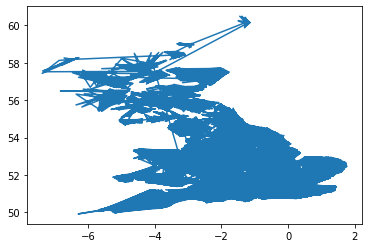

In [9]:
plt.plot(frame.Longitude, frame.Latitude)

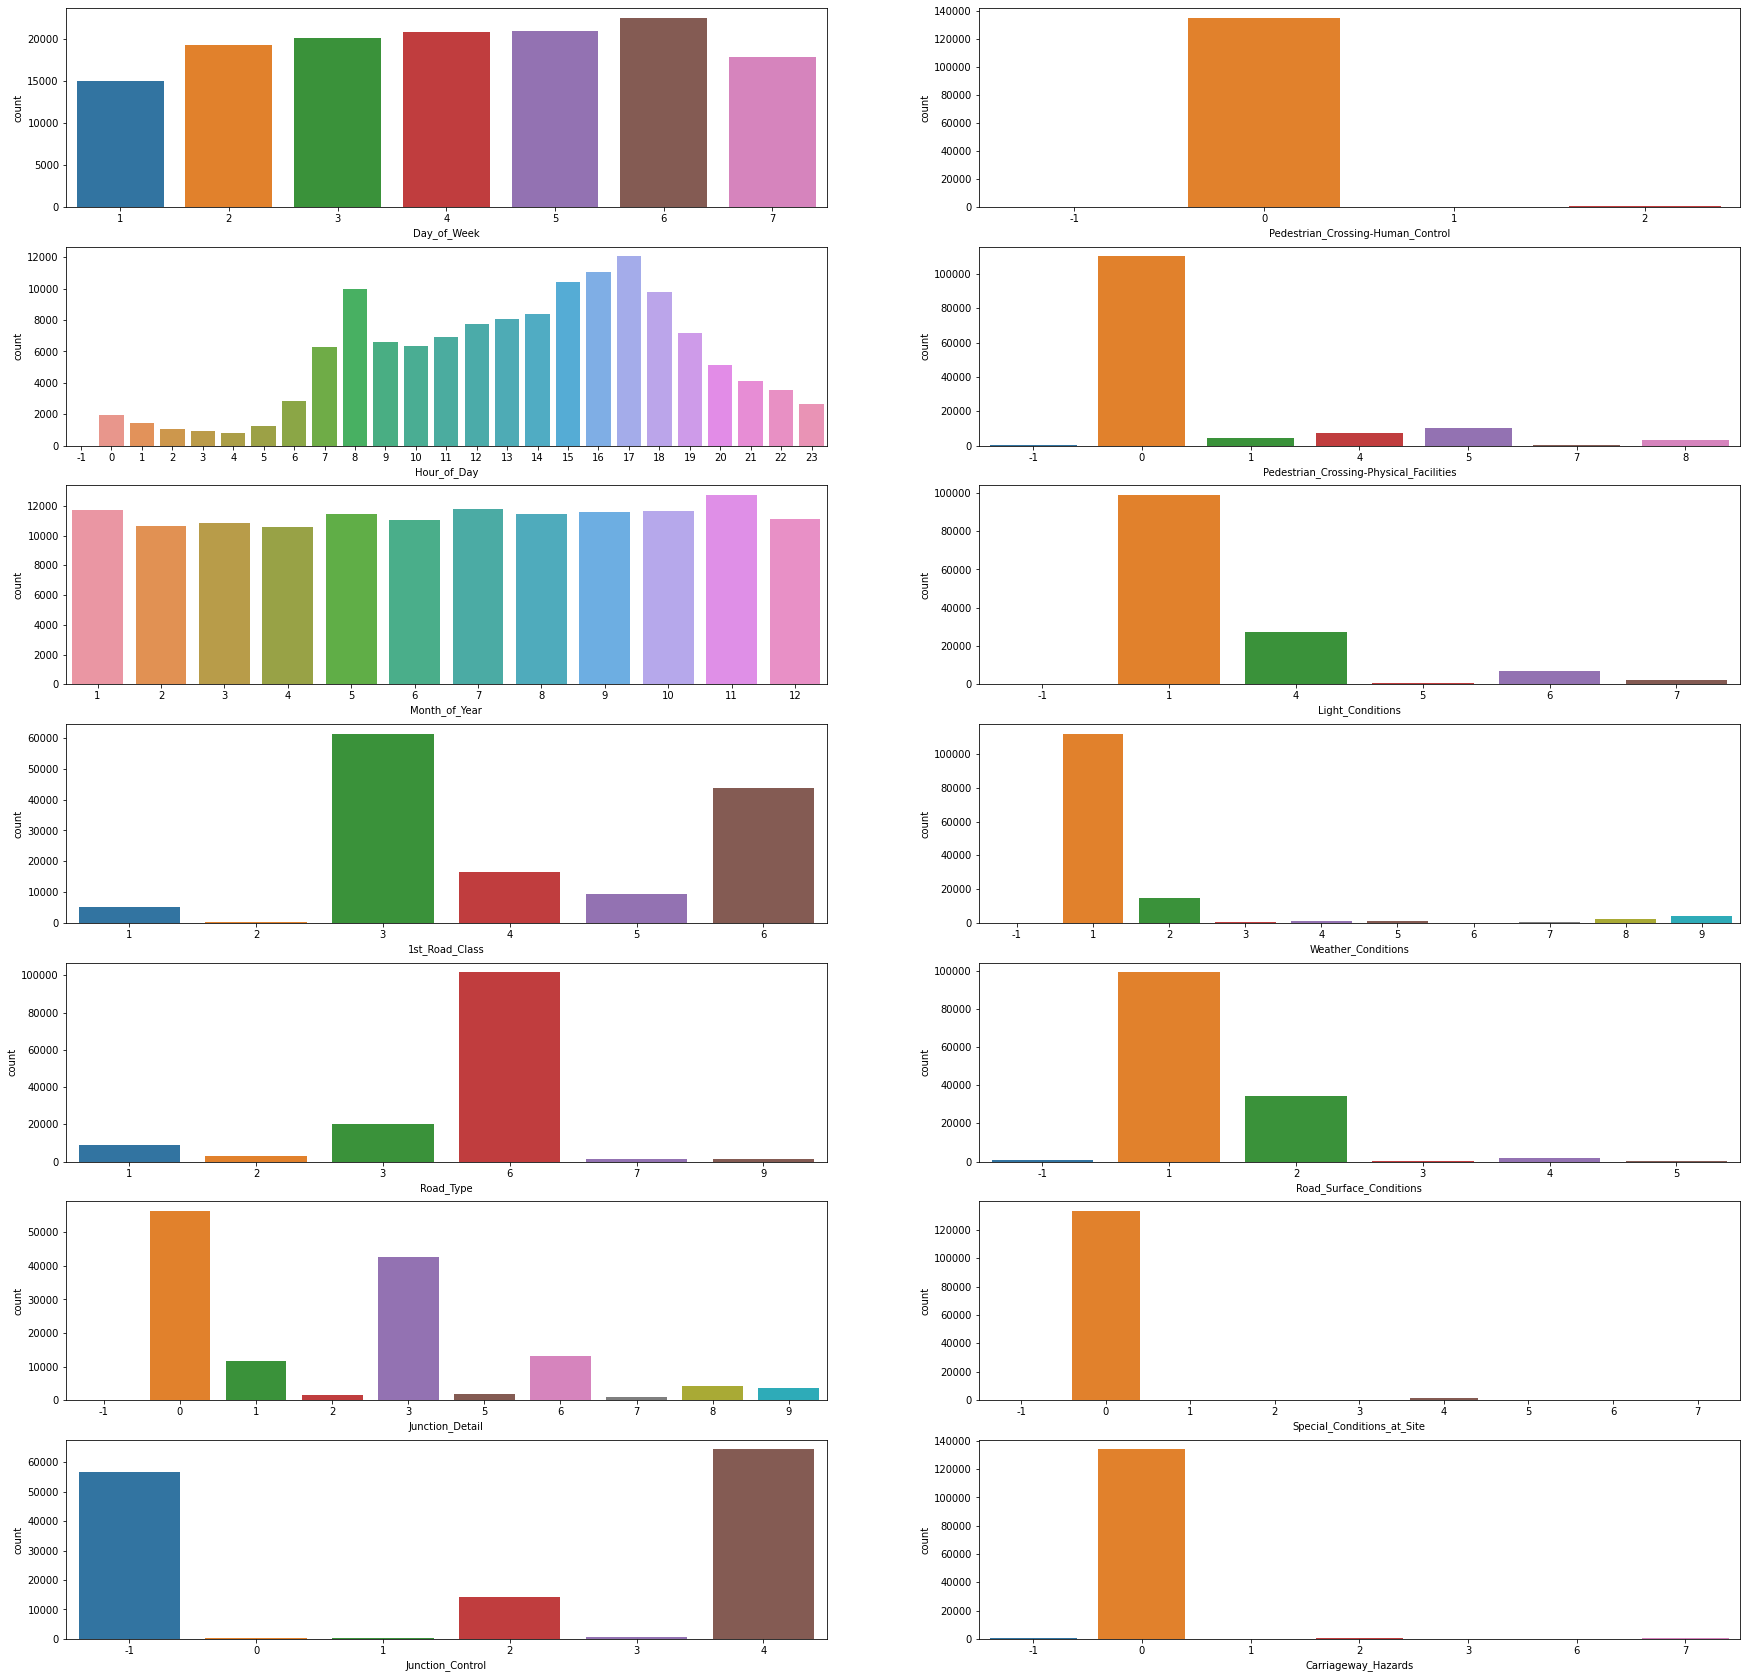

In [10]:
f, axes = plt.subplots(7, 2)
fig = plt.gcf()
fig.set_size_inches(30,30)

sns.countplot(x='Day_of_Week', data=frame, ax=axes[0,0])
sns.countplot(x='Hour_of_Day', data=frame, ax=axes[1,0])
sns.countplot(x='Month_of_Year', data=frame, ax=axes[2,0])
sns.countplot(x='1st_Road_Class', data=frame, ax=axes[3,0])
sns.countplot(x='Road_Type', data=frame, ax=axes[4,0])
sns.countplot(x='Junction_Detail', data=frame, ax=axes[5,0])
sns.countplot(x='Junction_Control', data=frame, ax=axes[6,0])

sns.countplot(x='Pedestrian_Crossing-Human_Control', data=frame, ax=axes[0,1])
sns.countplot(x='Pedestrian_Crossing-Physical_Facilities', data=frame, ax=axes[1,1])
sns.countplot(x='Light_Conditions', data=frame, ax=axes[2,1])
sns.countplot(x='Weather_Conditions', data=frame, ax=axes[3,1])
sns.countplot(x='Road_Surface_Conditions', data=frame, ax=axes[4,1])
sns.countplot(x='Special_Conditions_at_Site', data=frame, ax=axes[5,1])
sns.countplot(x='Carriageway_Hazards', data=frame, ax=axes[6,1])

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Month_of_Year', 'Hour_of_Day'],
      dtype='object')

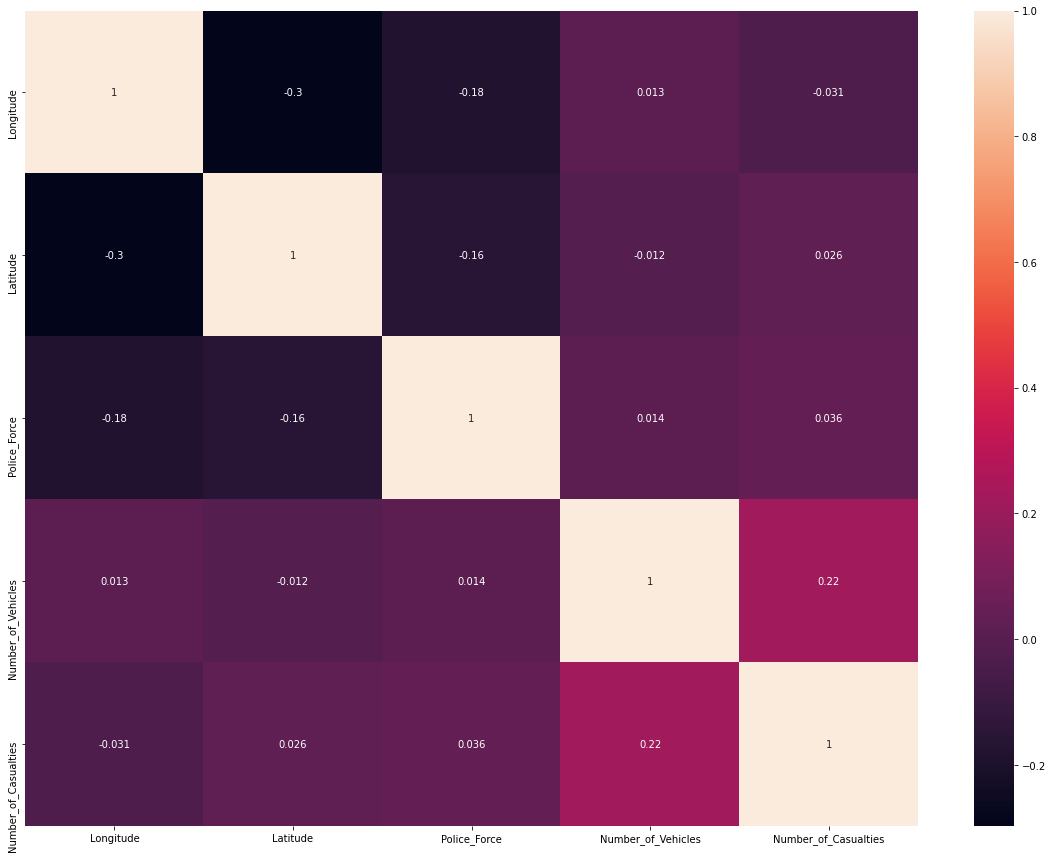

In [11]:
corr = frame[["Longitude","Latitude","Police_Force","Number_of_Vehicles","Number_of_Casualties"]].corr(method='kendall')
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
frame.columns

## Logic behind handling missing values
Usually the number of vehicles and speed limit depends on the interesection of the roads. Using this logic we are imputing the missing columns 

 - Step 1: We created a data frame with occupation, mean(fnlwgt)
 - Step 2: We imputed the missing fnlwgt column. by joining the data frame (with missing values) with the data frame generated in Step 1.
 - Step 3: Built the final data frame with union (missed df, non-missed df)

In [12]:
def fill_missing(frame, column_names):
    for column_name in column_names:
        not_missing = frame[~frame[column_name].isnull()]
        missing = frame[frame[column_name].isnull()]
        missing.drop([column_name], axis=1, inplace=True)
    
        new_df = pd.merge(missing, not_missing.groupby(['1st_Road_Class','2nd_Road_Class'])[column_name].mean(), how='left', left_on=['1st_Road_Class','2nd_Road_Class'], right_on = ['1st_Road_Class','2nd_Road_Class'])
        frames= [not_missing[['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', \
                              'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', \
                              '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', \
                              'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', \
                              'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', \
                              'Weather_Conditions', 'Road_Surface_Conditions', \
                              'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', \
                              'Did_Police_Officer_Attend_Scene_of_Accident','Month_of_Year','Hour_of_Day']], \
                 new_df[['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', \
                         'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', \
                         '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', \
                         'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', \
                         'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', \
                         'Weather_Conditions', 'Road_Surface_Conditions', \
                         'Special_Conditions_at_Site', 'Carriageway_Hazards', \
                         'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Month_of_Year', \
                         'Hour_of_Day']]]
        frame=pd.concat(frames)
    
    return frame


def update_col(frame,column_names):
    for column_name in column_names:
        frame[column_name] = frame[column_name].astype('category')
        frame = pd.concat([frame,pd.get_dummies(frame[column_name], prefix=column_name, drop_first=True)],axis=1)
        frame.drop([column_name], axis=1, inplace=True)
    
    return frame

frame = fill_missing(frame, ['Number_of_Vehicles','Speed_limit'])
print(frame.isnull().sum())

frame = update_col(frame, ['Accident_Severity','Day_of_Week', '1st_Road_Class','Road_Type','Junction_Detail', \
                           'Junction_Control','2nd_Road_Class','Pedestrian_Crossing-Human_Control', \
                           'Pedestrian_Crossing-Physical_Facilities','Light_Conditions','Weather_Conditions', \
                           'Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards', \
                           'Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident','Month_of_Year', \
                           'Hour_of_Day'])

frame.info()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
1st_Road_Class                                 0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area 

## TRAIN AND TEST DATA SPLITTING

In [13]:
from sklearn.model_selection import train_test_split
X = frame.loc[:, frame.columns != 'Number_of_Casualties']
y = frame.Number_of_Casualties
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)
print('Training data shape: '+str(X_train_org.shape))
print('Test data shape: '+ str(X_test_org.shape))

Training data shape: (95629, 123)
Test data shape: (40985, 123)


## Scaling the data

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# MODELS AND ANALYSIS

## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
lreg = linear_model.LinearRegression()

lreg.fit(X_train, y_train)
print('Train Score: ',lreg.score(X_train, y_train))
print('Test Score: ',lreg.score(X_test, y_test))
y_pred = lreg.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

## POLYNOMIAL REGRESSION

In [ ]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
mse = []

for n in range(2,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    y_pred = lreg.predict(X_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))
    
print(train_score_list)
print(test_score_list)
print(mse)

## KNEIGHBORS REGRESSOR

In [ ]:
k_range = range(1,6,2)
train_score_knn = []
test_score_knn = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    train_score_knn.append(neigh.score(X_train, y_train))
    test_score_knn.append(neigh.score(X_test, y_test))
    

plt.plot(k_range, train_score_knn, label = 'Train score')
plt.plot(k_range, test_score_knn, label = 'Test score')
plt.legend()
plt.xlabel('k nearest neighbours: K')
plt.ylabel('Accuracy')

In [ ]:
x_range_1 = range(1,6,2)
tuned_parameters=dict(n_neighbors=x_range_1)

knn_reg = KNeighborsRegressor()
gri12=GridSearchCV(knn_reg,tuned_parameters,cv=3,iid = False)
gri_model12=gri12.fit(X_train,y_train)

print(gri_model12.best_params_)
print('validation score: ', gri_model12.best_score_)
y_pred12= gri_model12.score(X_test,y_test)
print(y_pred12)


In [ ]:
y_pred = gri_model12.predict(X_test)
print(gri_model12.score(X_train,y_train))
print(gri_model12.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

## RIDGE REGRESSION

In [ ]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
gri1=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model1=gri1.fit(X_train,y_train)

print(gri1.best_params_)
print('validation score: ', gri1.best_score_)
y_pred1= gri_model1.score(X_test,y_test)
print(y_pred1)

In [ ]:
y_pred = gri_model1.predict(X_test)
print(gri_model1.score(X_train,y_train))
print(gri_model1.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

## LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
gri=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model=gri.fit(X_train,y_train)

print(gri_model.best_params_)
print('validation score: ', gri_model.best_score_)
y_pred= gri_model.score(X_test,y_test)
print(y_pred)

In [ ]:
y_pred = gri_model.predict(X_test)
print(gri_model.score(X_train,y_train))
print(gri_model.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

## SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

print("SGD regression coefficient: " + str(sgd_reg.coef_))
print("SGD regression intercept: " + str(sgd_reg.intercept_))
print("SGD regression iterations: " + str(sgd_reg.n_iter_))

In [ ]:
y_pred = sgd_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))

 LINEARSVR

In [43]:
from sklearn import svm
from sklearn.svm import LinearSVR

tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100]}]

lsvm_grid = GridSearchCV(svm.LinearSVR(), param_grid=tuning_parameters,cv=5)
grid_lsvm=lsvm_grid.fit(X_train,y_train) 

print('train score: ', grid_lsvm.score(X_train, y_train))
print('test score: ', grid_lsvm.score(X_test, y_test))
print('Best Paramters' ,grid_lsvm.best_params_)
print('Best score:', grid_lsvm.best_score_)
y_pred = grid_lsvm.predict(X_test)
print(mean_squared_error(y_test, y_pred))

train score:  -0.16855323669537814
test score:  -0.18170165961182216
Best Paramters {'C': 1}
Best score: -0.16975839725704905
0.7004037877132604


## SVM REGRESSOR

## $ \underline{ NOTE: } $ All the below SVM models with kernels took multiple days to run.

### Linear Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['linear']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_linear=svm_grid.fit(X_train,y_train) 
print(svm_model_linear.best_params_)
print('Validation score:', svm_model_linear.best_score_) 

In [ ]:
y_pred = svm_model_linear.predict(X_test)
print(svm_model_linear.score(X_train,y_train))
print(svm_model_linear.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

### RBF Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['rbf']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_rbf=svm_grid.fit(X_train,y_train) 
print(svm_model_rbf.best_params_)
print('Validation score:', svm_model_rbf.best_score_) 

In [ ]:
y_pred = svm_model_rbf.predict(X_test)
print(svm_model_rbf.score(X_train,y_train))
print(svm_model_rbf.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

### Poly Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1,1], 'kernel':['poly']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_poly=svm_grid.fit(X_train,y_train) 
print(svm_model_poly.best_params_)
print('Validation score:', svm_model_poly.best_score_) 

In [ ]:
y_pred = svm_model_poly.predict(X_test)
print(svm_model_poly.score(X_train,y_train))
print(svm_model_poly.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.08510803174295731 {'max_depth': 5}


In [26]:
import graphviz 
from sklearn import tree
reg=DecisionTreeRegressor(max_depth=5)
reg.fit(X=X_train, y=y_train)
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Decision Regressor") 

'Decision Regressor.pdf'

In [ ]:
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# Conclusion

After comparing the performance of all models in training and testing datasets, we see that Linear Regression and Ridge regression had the lowest MSE score and the best model for predicting this dataset. They give the same result

As per my understanding the reason for low score would be due to the target variable. The target variable that was chosen for this project is 'Number of Casualities' which is a whole number and the models are trying to predict the coefficients might have struggled to get the whole number. 
Rounding the data while running the model isn't really the right approach as it would be like manipulating the results which we did not want to.

Although the data wasn't really the easy one to perform regression but it did expose us to the limitations with regression models when the expected target variable is a whole number. But when higher and better models models are used, they might yield a better score. 


### Best Parameters for every model 
| Model | Best Params |
| --- | --- |
| Polynomial regression | 3 |
| KNN Regressor | k = 5 |
| Ridge Regression | alpha = 1 |
| Lasso Regression | alpha = 0.01 |
| SVM Linear Kernel | C = 0.1 |
| SVM RBF Kernel | C = 1 |
| SVM Poly Kernel | C = 1 |
| Decision Tree Regressor | max_depth = 4 | 

### Performance on Dataset
| Model | Linear Regression | Polynomial Regression | Polynomial Regression | KNN Regressor | Ridge Regression | Lasso Regression | SGD Regressor | SVM Linear | SVM RBF | SVM Poly | Decision Tree Regressor |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Params | default | poly=2 | poly=3 |  k=5 | alpha =1 | alpha=0.01 | default | C=0.1 | C=1 | C=1 | max_depth=4| 
| Score Training | 0.0951 | 0.10 | 0.17 | 0.23 | 0.0951 | 0.03 | -719467803.8714623 | -0.08| -0.08| 0.03 |  0.09 |
| Score Test | 0.098 | -2.21e+18 | -2.01e+16 | -0.14 | 0.098 |  0.03 | -475322833.350394 | -0.08| -0.08| -0.03 | 0.08 |
| MSE | 0.53 | 1.35e+18 | 1.23e+16 |  0.73 | 0.53 | 0.62 | 301591528.0394274 | 0.68| 0.68 | 0.63 | 0.58 | 

## Linear Regression with params default

In [ ]:
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score: ',lreg.score(X_train, y_train))
print('Test Score: ',lreg.score(X_test, y_test))
y_pred = lreg.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

## Ridge Regression with Alpha 1

In [ ]:
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: ',ridge.score(X_train,y_train))
print('Test score: ', ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

# PROJECT - II

In [15]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Bagging for Linear Regression

In [17]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            }
linear = LinearRegression()

linear_bag_grid = GridSearchCV(BaggingRegressor(linear,bootstrap=True, oob_score=True, random_state=0),tuned_parameters)
linear_bag_grid_model=linear_bag_grid.fit(X_train, y_train)

print("Linear bag grid model Best params: ")
print(linear_bag_grid_model.best_params_)

print('Train Score: ',linear_bag_grid_model.score(X_train, y_train))
print('Test Score: ',linear_bag_grid_model.score(X_test, y_test))
y_pred = linear_bag_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Linear bag grid model Best params: 
{'max_features': 8, 'max_samples': 0.5, 'n_estimators': 100}
Train Score:  0.019614663615036276
Test Score:  0.02093238720912627
MSE:  0.580301008167635


## Bagging for Ridge Regression

In [18]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            }
ridge = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

ridge_bag_grid = GridSearchCV(BaggingRegressor(ridge,bootstrap=True, oob_score=True, random_state=0),tuned_parameters)
ridge_bag_grid_model=ridge_bag_grid.fit(X_train, y_train)

print("Ridge bag grid model Best params: ")
print(ridge_bag_grid_model.best_params_)

print('Train Score: ',ridge_bag_grid_model.score(X_train, y_train))
print('Test Score: ',ridge_bag_grid_model.score(X_test, y_test))
y_pred = ridge_bag_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Ridge bag grid model Best params: 
{'max_features': 8, 'max_samples': 0.5, 'n_estimators': 100}
Train Score:  0.018832444450122443
Test Score:  0.02027636467717031
MSE:  0.580689837837518


## Pasting for Linear Regression

In [19]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            }
linear = LinearRegression()

linear_paste_grid = GridSearchCV(BaggingRegressor(linear,bootstrap=False, random_state=0),tuned_parameters)
linear_paste_grid_model=linear_paste_grid.fit(X_train, y_train)

print("Linear Pasting grid model Best params: ")
print(linear_paste_grid_model.best_params_)

print('Train Score: ',linear_paste_grid_model.score(X_train, y_train))
print('Test Score: ',linear_paste_grid_model.score(X_test, y_test))
y_pred = linear_paste_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Linear Pasting grid model Best params: 
{'max_features': 8, 'max_samples': 0.1, 'n_estimators': 100}
Train Score:  0.019486100583591015
Test Score:  0.020835510677042812
MSE:  0.5803584276435745


## Pasting for Ridge Regression

In [20]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            }
ridge = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

ridge_paste_grid = GridSearchCV(BaggingRegressor(ridge,bootstrap=False, random_state=0),tuned_parameters)
ridge_paste_grid_model=ridge_paste_grid.fit(X_train, y_train)

print("Ridge Pasting grid model Best params: ")
print(ridge_paste_grid_model.best_params_)

print('Train Score: ',ridge_paste_grid_model.score(X_train, y_train))
print('Test Score: ',ridge_paste_grid_model.score(X_test, y_test))
y_pred = ridge_paste_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Ridge Pasting grid model Best params: 
{'max_features': 8, 'max_samples': 0.5, 'n_estimators': 100}
Train Score:  0.01870890903912592
Test Score:  0.02020192092660944
MSE:  0.5807339612289345


## Adaboosting for Linear Regression 

In [21]:
tuned_parameters = {"learning_rate":[0.05,0.1,0.2,0.6,0.8,1],
                    "n_estimators": [50,100,200,500],
                    "loss" : ["linear", "square", "exponential"]
                   }

linear = LinearRegression()

linear_ada_grid = GridSearchCV(AdaBoostRegressor(linear, random_state=0),tuned_parameters)
linear_ada_grid_model = linear_ada_grid.fit(X_train, y_train)

print("Linear Adaboosting grid model Best params: ")
print(linear_ada_grid_model.best_params_)

print('Train Score: ',linear_ada_grid_model.score(X_train, y_train))
print('Test Score: ',linear_ada_grid_model.score(X_test, y_test))
y_pred = linear_ada_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))


Linear Adaboosting grid model Best params: 
{'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}
Train Score:  -22.569071635559578
Test Score:  -23.89199655012167
MSE:  14.7536804451791


## Adaboosting for Ridge Regression 

In [22]:
tuned_parameters = {"learning_rate":[0.05,0.1,0.2,0.6,0.8,1],
                    "n_estimators": [50,100,200,500],
                    "loss" : ["linear", "square", "exponential"]
                   }

ridge = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

ridge_ada_grid = GridSearchCV(AdaBoostRegressor(ridge, random_state=0),tuned_parameters)
ridge_ada_grid_model =ridge_ada_grid.fit(X_train, y_train)

print("Ridge Adaboosting grid model Best params: ")
print(ridge_ada_grid_model.best_params_)

print('Train Score: ',ridge_ada_grid_model.score(X_train, y_train))
print('Test Score: ',ridge_ada_grid_model.score(X_test, y_test))
y_pred = ridge_ada_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))


Ridge Adaboosting grid model Best params: 
{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50}
Train Score:  0.06595021790224953
Test Score:  0.06529858749605943
MSE:  0.5540048153217852


## Gradient Boosting

In [23]:
tuned_parameters = {"max_depth": [3,5,6,7],
                    "max_features":['auto', 'sqrt', 'log2'],
                    "learning_rate":[0.05,0.1,0.2,0.6,0.8,1],
                    "n_estimators": [50,100,200,500]}

grad_boost_grid = GridSearchCV(GradientBoostingRegressor(loss = 'lad',random_state=0),tuned_parameters)
grad_boost_grid_model = grad_boost_grid.fit(X_train,y_train)

print("Gradient boosting grid model Best params: ")
print(grad_boost_grid_model.best_params_)

print('Train Score: ',grad_boost_grid_model.score(X_train, y_train))
print('Test Score: ',grad_boost_grid_model.score(X_test, y_test))
y_pred = grad_boost_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Gradient boosting grid model Best params: 
{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}
Train Score:  0.036604929652750196
Test Score:  -0.051747281094375534
MSE:  0.6233788142750055


# Principle Component Analysis

In [45]:
from sklearn.decomposition import PCA
pca90 = PCA(.90,random_state=0)
pca90.fit(X_train)
pca90.n_components_

49

In [16]:
pca95 = PCA(.95,random_state=0)
pca95.fit(X_train)
pca95.n_components_

62

In [47]:
pca99 = PCA(.99,random_state=0)
pca99.fit(X_train)
pca99.n_components_

87

In [17]:
X_train_without_PCA= X_train
X_test_without_PCA= X_test
X_train = pca95.transform(X_train)
X_test = pca95.transform(X_test)

## LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
lreg = linear_model.LinearRegression()

lreg.fit(X_train, y_train)
print('Train Score: ',lreg.score(X_train, y_train))
print('Test Score: ',lreg.score(X_test, y_test))
y_pred = lreg.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Train Score:  0.042095633429830026
Test Score:  0.044545069042125074
MSE:  0.5663055875304724


## POLYNOMIAL REGRESSION

In [20]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
mse = []

for n in range(2,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    y_pred = lreg.predict(X_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))
    
print(train_score_list)
print(test_score_list)
print(mse)

[0.08826823793900196]
[0.04705307768089706]
[0.5648190712546212]


## KNEIGHBORS REGRESSOR

Text(0, 0.5, 'Accuracy')

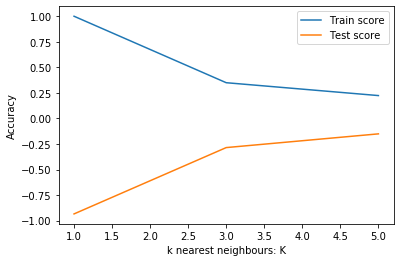

In [31]:
k_range = range(1,6,2)
train_score_knn = []
test_score_knn = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    train_score_knn.append(neigh.score(X_train, y_train))
    test_score_knn.append(neigh.score(X_test, y_test))
    

plt.plot(k_range, train_score_knn, label = 'Train score')
plt.plot(k_range, test_score_knn, label = 'Test score')
plt.legend()
plt.xlabel('k nearest neighbours: K')
plt.ylabel('Accuracy')

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
x_range_1 = range(1,6,2)
tuned_parameters=dict(n_neighbors=x_range_1)

knn_reg = KNeighborsRegressor()
gri12=GridSearchCV(knn_reg,tuned_parameters,cv=3,iid = False)
gri_model12=gri12.fit(X_train,y_train)

print(gri_model12.best_params_)
print('validation score: ', gri_model12.best_score_)
y_pred12= gri_model12.score(X_test,y_test)
print(y_pred12)


{'n_neighbors': 5}
validation score:  -0.16095401038569532
-0.15100162351249513


In [35]:
y_pred = gri_model12.predict(X_test)
print(gri_model12.score(X_train,y_train))
print(gri_model12.score(X_test,y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.22368599059513328
-0.15100162351249513
0.6822076369403439


## RIDGE REGRESSION

Text(0.5, 0, '$\\alpha$')

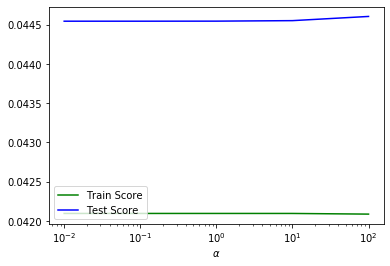

In [36]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,random_state=0)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
gri1=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model1=gri1.fit(X_train,y_train)

print(gri1.best_params_)
print('validation score: ', gri1.best_score_)
y_pred1= gri_model1.score(X_test,y_test)
print(y_pred1)

{'alpha': 100}
validation score:  0.04101090099604565
0.04460566449739257


In [38]:
y_pred = gri_model1.predict(X_test)
print(gri_model1.score(X_train,y_train))
print(gri_model1.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

0.04208701717082097
0.04460566449739257
0.5662696721316556


## LASSO REGRESSION

Text(0.5, 0, '$\\alpha$')

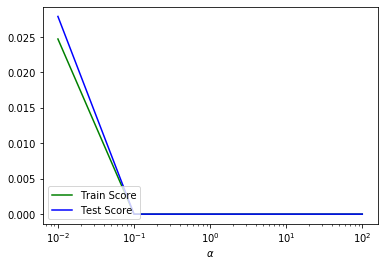

In [39]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
gri=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
gri_model=gri.fit(X_train,y_train)

print(gri_model.best_params_)
print('validation score: ', gri_model.best_score_)
y_pred= gri_model.score(X_test,y_test)
print(y_pred)

{'alpha': 0.01}
validation score:  0.024623592902992476
0.027889344701536367


In [41]:
y_pred = gri_model.predict(X_test)
print(gri_model.score(X_train,y_train))
print(gri_model.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

0.024708383579116755
0.027889344701536367
0.5761775652165225


## SGD Regressor

In [42]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))
y_pred = sgd_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.009907460231954435
0.009122754678833056
0.5873006694513775


LINEAR SVR

In [49]:
from sklearn import svm
from sklearn.svm import LinearSVR

tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100]}]

lsvm_grid = GridSearchCV(svm.LinearSVR(), param_grid=tuning_parameters,cv=5)
grid_lsvm=lsvm_grid.fit(X_train,y_train) 

print('train score: ', grid_lsvm.score(X_train, y_train))
print('test score: ', grid_lsvm.score(X_test, y_test))
print('Best Paramters' ,grid_lsvm.best_params_)
print('Best score:', grid_lsvm.best_score_)
y_pred = grid_lsvm.predict(X_test)
print(mean_squared_error(y_test, y_pred))

train score:  -0.16855524335340522
test score:  -0.18169963264177857
Best Paramters {'C': 1}
Best score: -0.16975899084490353
0.7004025863123108


## SVM REGRESSOR

## $ \underline{ NOTE: } $ All the below SVM models with kernels took multiple days to run.

### Linear Kernel

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['linear']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_linear=svm_grid.fit(X_train,y_train) 
print(svm_model_linear.best_params_)
print('Validation score:', svm_model_linear.best_score_) 

{'C': 1, 'kernel': 'linear'}
Validation score: -0.0816729697939599


In [44]:
y_pred = svm_model_linear.predict(X_test)
print(svm_model_linear.score(X_train,y_train))
print(svm_model_linear.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

-0.08130630355258672
-0.08782825951730655
0.644764291519848


### RBF Kernel

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1], 'kernel':['rbf']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_rbf=svm_grid.fit(X_train,y_train) 
print(svm_model_rbf.best_params_)
print('Validation score:', svm_model_rbf.best_score_) 

{'C': 1, 'kernel': 'rbf'}
Validation score: -0.08148738977126876


In [46]:
y_pred = svm_model_rbf.predict(X_test)
print(svm_model_rbf.score(X_train,y_train))
print(svm_model_rbf.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

-0.08083441539109358
-0.08768592412128551
0.6446799282207971


### Poly Kernel

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1,1], 'kernel':['poly']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_poly=svm_grid.fit(X_train,y_train) 
print(svm_model_poly.best_params_)
print('Validation score:', svm_model_poly.best_score_) 

{'C': 1, 'kernel': 'poly'}
Validation score: -0.08156676713386866


In [48]:
y_pred = svm_model_poly.predict(X_test)
print(svm_model_poly.score(X_train,y_train))
print(svm_model_poly.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

-0.0810139814901849
-0.08777105997498902
0.6447303889051156


## Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(random_state= 0), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.011276235821413771 {'max_depth': 3}


In [23]:
import graphviz 
from sklearn import tree
reg=DecisionTreeRegressor(max_depth=5,random_state= 0)
reg.fit(X=X_train, y=y_train)
dot_data = tree.export_graphviz(reg, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("Decision Regressor PCA") 

'Decision Regressor PCA.pdf'

In [51]:
reg=DecisionTreeRegressor(max_depth=5,random_state= 0)
reg.fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(mean_squared_error(y_test, y_pred))

0.03056719323015178
0.020591291736263728
0.5805031781140182


# Deep Learning Model

In [23]:
X_train1 = np.asarray(X_train_without_PCA) 
X_test1 = np.asarray(X_test_without_PCA) 
y_train1 = np.asarray(y_train) 
y_test1 = np.asarray(y_test) 

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=123, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

model.fit(X_train1, y_train1, epochs= 20, batch_size=128)

y_pred1 = model.predict(X_test1)
print(model.evaluate(X_train1,y_train1))
print(model.evaluate(X_test1,y_test1))
print(mean_squared_error(y_test1, y_pred1))

Using TensorFlow backend.


Epoch 1/20
95629/95629 [==============================] - 3s 34us/step - loss: 0.7036 - mse: 0.7036 - mae: 0.5294
Epoch 2/20
95629/95629 [==============================] - 1s 11us/step - loss: 0.6032 - mse: 0.6032 - mae: 0.4810
Epoch 3/20
95629/95629 [==============================] - 1s 11us/step - loss: 0.5935 - mse: 0.5935 - mae: 0.4745
Epoch 4/20
95629/95629 [==============================] - 1s 9us/step - loss: 0.5842 - mse: 0.5842 - mae: 0.4669
Epoch 5/20
95629/95629 [==============================] - 1s 9us/step - loss: 0.5797 - mse: 0.5797 - mae: 0.4628
Epoch 6/20
95629/95629 [==============================] - 1s 10us/step - loss: 0.5766 - mse: 0.5766 - mae: 0.4594
Epoch 7/20
95629/95629 [==============================] - ETA: 0s - loss: 0.5774 - mse: 0.5775 - mae: 0.457 - 1s 10us/step - loss: 0.5751 - mse: 0.5751 - mae: 0.4580
Epoch 8/20
95629/95629 [==============================] - 1s 9us/step - loss: 0.5733 - mse: 0.5733 - mae: 0.4564
Epoch 9/20
95629/95629 [===============